In [ ]:

#    Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/
#    Реализовать самостоятельно логистическую регрессию
#        Обучить ее методом градиентного спуска
#        Методом nesterov momentum
#        Методом rmsprop
#    В качестве dataset'а взять Iris, оставив 2 класса:
#        Iris Versicolor
#        Iris Virginica



In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Обычная линейная регрессия

In [31]:
N = 100
X = np.random.uniform(low=0, high=100, size=(N,2))
Y = 1 + 0.3*X[:,0] + 1.5*X[:,1] +  np.random.normal(scale=5, size=N)

In [124]:
def lin_reg(X,y, alpha=0.000001, era=1000000, eps=0.0000001):
    j = 0
    m = len(X[0])+1
    teta_old = np.zeros(m)
    teta = np.ones(m)
    while (np.sum(np.abs(teta-teta_old) > eps)>0) and (era > j):
        teta_old = teta.copy()
        teta[0] = teta_old[0] + alpha * np.sum(y - (np.dot(teta_old[1:],X.T)+teta_old[0]))/len(y)
        teta[1:] = teta_old[1:] + alpha*np.sum(X*(y-(np.dot(teta_old[1:],X.T)+teta_old[0])).reshape(len(y),1), axis=0)/len(y)
        if(j%50000 == 0):
            print(j, teta)
        j+=1 
    print('Количество эпох:',j-1)    
    return teta


In [35]:
teta = lin_reg(X,Y)
print('Результат:', teta)

0 [-6.51579210e-06 -8.71005319e-04  6.25744364e-05]
10503
Результат: [0.99864886 0.30673969 1.49679383]


In [ ]:
# как можно видеть получившиеся коэффициенты отличаются от задааных не более, чем на доли процента  

In [75]:
#  Логистическая регрессия с обучением обычным градиентным спуском

In [9]:
from sklearn.datasets import load_iris
data_all = load_iris()
data_X = data_all['data']
data_y = data_all['target']
data_all['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [60]:
X_all = np.hstack((data_X, data_y.reshape(150,1)))


In [61]:
# фильтруем класс setosa
X_y = X_all[X_all[:,-1] != 0]


In [105]:
X = X_y[:,:-1]
y = X_y[:,-1]-1
  

In [127]:
def log_reg(X,y, alpha=0.005, era=1000000, eps=0.0000001):
    '''
       получаем коэффициенты для регрессии
    '''
    j = 0
    m = len(X[0])+1
    teta_old = np.zeros(m)
    teta = np.ones(m)
    while (np.sum(np.abs(teta-teta_old) > eps)>0) and (era > j):
        teta_old = teta.copy()
        teta[0] = teta_old[0] + alpha*np.sum(y-(1/(1+np.exp(-(np.dot(teta_old[1:],X.T)+teta_old[0])))))/len(y)
        teta[1:] = teta_old[1:] + alpha*np.sum(X*((y-1/(1+np.exp(-(np.dot(teta_old[1:],X.T)+teta_old[0])))).reshape(len(y),1)), axis=0)/len(y)
        if(j%50000 == 0):
            print(j,teta)
        j+=1 
    print('Количество эпох:',j-1)     
    return teta

def get_pred(y, level = 0.5):
    '''
       переводим получившиеся коэффициенты в метки классов по уровню отсечения
    '''
    return np.floor(y+1-level)
    

In [128]:
teta = log_reg(X, y)
y_p = 1/(1+np.exp(-(np.sum(X*teta[1:],axis=1)+teta[0])))
y_c = get_pred(y_p)

0 [0.9975     0.98516001 0.993075   0.98935001 0.996685  ]
50000 [-1.87045906 -3.25285823 -3.03253649  4.55626093  5.15813779]
100000 [-3.10070432 -3.7239182  -3.78182174  5.39592671  6.4558262 ]
150000 [-4.08175549 -3.95752842 -4.18325618  5.84619961  7.26643342]
200000 [-4.93070165 -4.09277377 -4.43975416  6.13792177  7.84935044]
250000 [-5.69130058 -4.17370568 -4.61852235  6.34311401  8.29882247]
300000 [-6.38598397 -4.2204993  -4.74968255  6.49385864  8.66088055]
350000 [-7.02834705 -4.24426738 -4.84913187  6.60740547  8.96161362]
400000 [-7.62753499 -4.25183692 -4.92621647  6.69419453  9.21722682]
450000 [-8.19014397 -4.24771199 -4.98687458  6.76107488  9.43844285]
500000 [-8.72116937 -4.2350161  -5.03510525  6.812805    9.63269855]
550000 [-9.22453022 -4.21599587 -5.07372476  6.85283231  9.80534572]
600000 [-9.70338319 -4.19231217 -5.10478718  6.88373344  9.96035315]
650000 [-10.16032306  -4.16521863  -5.1298329    6.90747961  10.10073879]
700000 [-10.59751725  -4.13567656  -5.15

In [129]:
y_c

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [130]:
from sklearn.metrics import roc_auc_score

In [131]:
roc_auc_score(y,y_c)

0.9699999999999999

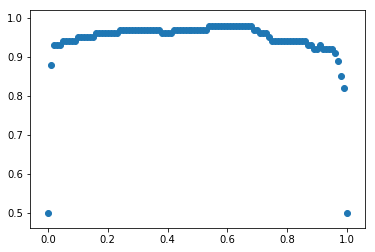

In [132]:
plt.scatter(np.array([0.01*l for l in range(101)]), np.array([roc_auc_score(y,get_pred(y_p,0.01*l)) for l in range(101)]))

In [ ]:
# как видно из результатов модель сошлась не доконца (отсеклось по количеству эпох) 

In [ ]:
#  Логистическая регрессия с обучением Nesterov Accelerated Gradient

In [133]:
def log_reg_nest(X,y, alpha=0.005, era=1000000, eps=0.0000001, gamma=0.9):
    '''
       получаем коэффициенты для регрессии
    '''
    j = 0
    m = len(X[0])+1
    vt = np.zeros(m)
    teta_old = np.zeros(m)
    teta = np.ones(m)
    while (np.sum(np.abs(teta-teta_old) > eps)>0) and (era > j):
        teta_old = teta.copy()
        gr =y-(1/(1+np.exp(-(np.dot((teta_old[1:]-gamma*vt[1:]),X.T)+(teta_old[0]-gamma*vt[0])))))
        vt[0]= gamma*vt[0]+(1-gamma)*alpha*np.sum(gr)/len(y)
        teta[0] = teta_old[0] + vt[0]
        vt[1:] = gamma*vt[1:]+(1-gamma)*alpha*np.sum(X*(gr.reshape(len(y),1)), axis=0)/len(y)
        teta[1:] = teta_old[1:] + vt[1:]
        if(j%50000 == 0):
            print(j,teta)
        j+=1 
    print('Количество эпох:',j-1) 
    return teta

In [134]:
teta = log_reg_nest(X, y)
y_p = 1/(1+np.exp(-(np.sum(X*teta[1:],axis=1)+teta[0])))
y_c = get_pred(y_p)

0 [0.99975   0.998516  0.9993075 0.998935  0.9996685]
50000 [-1.8705405  -3.25338819 -3.03291388  4.55698123  5.15869081]
100000 [-3.10073624 -3.7242621  -3.78211633  5.3964006   6.45623665]
150000 [-4.08176793 -3.95778515 -4.18349487  5.84655216  7.26676793]
200000 [-4.9307063  -4.09297825 -4.43995332  6.13820081  7.84963392]
250000 [-5.69130279 -4.17387437 -4.61869212  6.34334305  8.29906777]
300000 [-6.38598641 -4.22064145 -4.74982951  6.49405108  8.66109564]
350000 [-7.02835107 -4.2443888  -4.84926052  6.6075697   8.96180402]
400000 [-7.62754124 -4.25194158 -4.92633     6.69433621  9.2173966 ]
450000 [-8.19015274 -4.24780277 -4.9869754   6.76119805  9.43859516]
500000 [-8.72118076 -4.23509517 -5.0351952   6.81291264  9.63283586]
550000 [-9.22454418 -4.21606493 -5.0738053   6.85292675  9.80547002]
600000 [-9.70339964 -4.19237257 -5.10485949  6.88381651  9.96046608]
650000 [-10.16034186  -4.16527151  -5.12989797   6.90755283  10.10084172]
700000 [-10.59753825  -4.13572285  -5.150102 

In [135]:
roc_auc_score(y,y_c)

0.9699999999999999

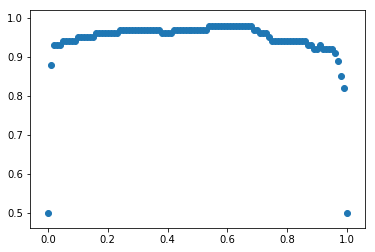

In [136]:
# смещая границу отсечения по классам от 0 до 1 можно увидеть насколько уверенно модель разделила классы  
plt.scatter(np.array([0.01*l for l in range(101)]), np.array([roc_auc_score(y,get_pred(y_p,0.01*l)) for l in range(101)]))

In [ ]:
#  вторая модель сошлась так же не доконца (отсеклось по количеству эпох)
#  и коэффициенты похожи на коэффициенты первой модели

In [137]:
#  Логистическая регрессия с обучением RMSProp

In [138]:
def log_reg_rmsp(X,y, alpha=0.001, era=500000, eps=0.0000001, gamma=0.9):
    '''
       получаем коэффициенты для регрессии
    '''
    j = 0
    e = 0.00000001
    m = len(X[0])+1
    Egt = np.zeros(m)
    teta_old = np.zeros(m)
    teta = np.ones(m)
    while (np.sum(np.abs(teta-teta_old) > eps)>0) and (era > j):
        teta_old = teta.copy()
        gt = y-(1/(1+np.exp(-(np.dot((teta_old[1:]),X.T)+(teta_old[0])))))
        teta[0] = teta_old[0] + alpha*(np.sum(gt)/len(y))/(np.sqrt(Egt[0]+e))
        teta[1:] = teta_old[1:] + alpha*(np.sum(X*(gt.reshape(len(y),1)), axis=0)/len(y))/(np.sqrt(Egt[1:]+e))
        Egt[0]  =gamma*Egt[0] +(1-gamma)*(np.sum(gt)/len(y))**2
        Egt[1:] =gamma*Egt[1:]+(1-gamma)*(np.sum(X*(gt.reshape(len(y),1)), axis=0)/len(y))**2
        if(j%50000 == 0):
            print(j,teta)
        j+=1
    print('Количество эпох:',j-1) 
    return teta

In [139]:
teta = log_reg_rmsp(X, y)
y_p = 1/(1+np.exp(-(np.sum(X*teta[1:],axis=1)+teta[0])))
y_c = get_pred(y_p)

0 [ -3.9999971  -28.67998439 -12.84999284 -20.29998915  -5.62999663]
50000 [-13.86960134  -3.93106256  -5.44533895   7.05763543  11.51051579]
100000 [-40.81253205  -2.48602105  -6.51519164   9.17609933  17.74015963]
150000 [-42.56722962  -2.46737595  -6.67405903   9.41931695  18.26998264]
200000 [-42.65082369  -2.46541555  -6.68471118   9.43158468  18.29459681]
250000 [-42.63240178  -2.46468508  -6.6829154    9.42870997  18.28636295]
300000 [-42.65623422  -2.46429979  -6.68283998   9.43206354  18.28919459]
Количество эпох: 311256


In [140]:
roc_auc_score(y,y_c)

0.98

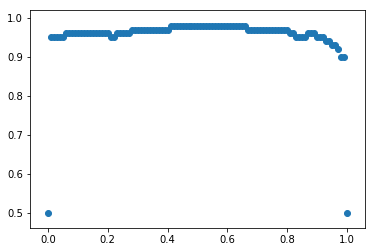

In [141]:
plt.scatter(np.array([0.01*l for l in range(101)]), np.array([roc_auc_score(y,get_pred(y_p,0.01*l)) for l in range(101)]))

In [ ]:
#  третья модель сошлась значительно быстрей 
#  к конечным значениям близко подошла примерно в 8 раз быстрей, чем первые две 
#  и еще модель более уверено разделяет классы, чем первые две